## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [132]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [133]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [134]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [135]:
#4 Check for missing  values if any, replace with appropriate values
miss=df.isnull().sum()
miss[miss>0]


Series([], dtype: int64)

In [136]:
#5 Prepare  X (independent variables) and y (dependent variable)
Y=df['price']
X=df.drop(columns=['price'])
X.head()
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

<Axes: xlabel='area', ylabel='price'>

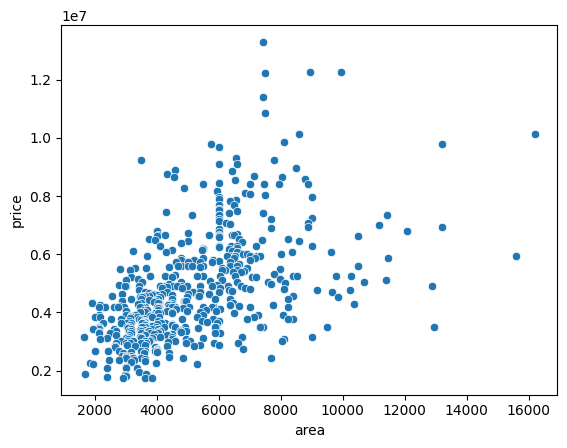

In [137]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
Y = df['price']
X = df['area']
sns.scatterplot(x=X, y=Y)


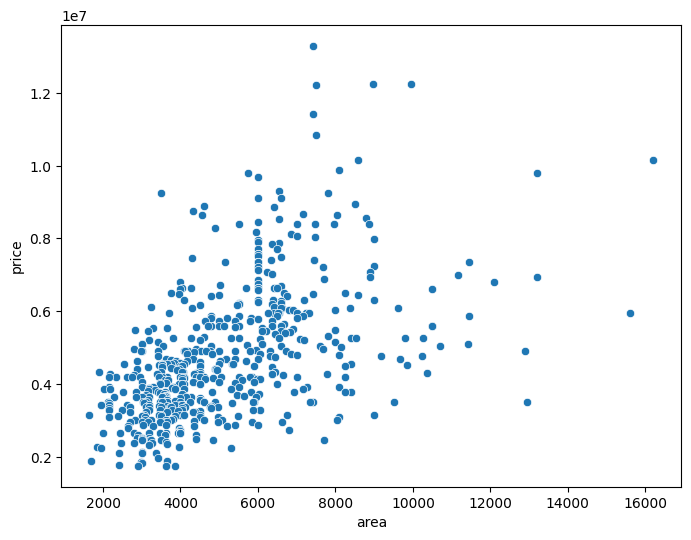

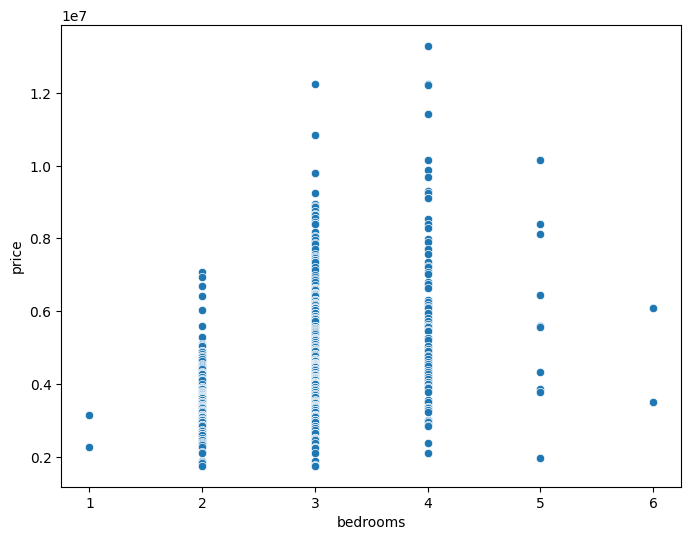

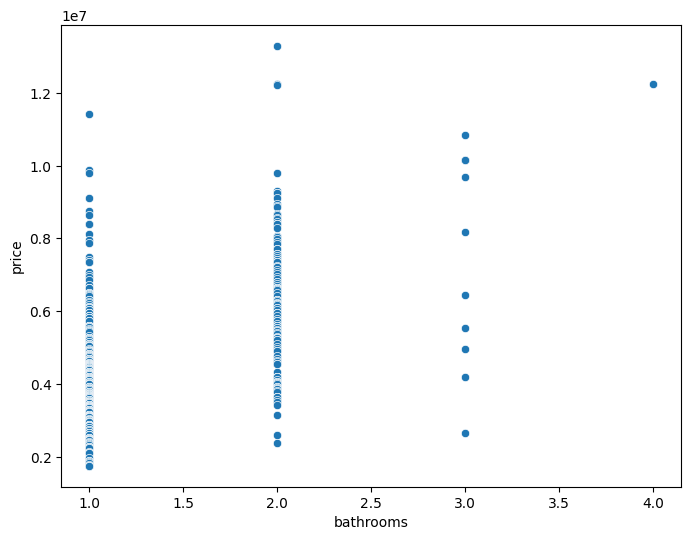

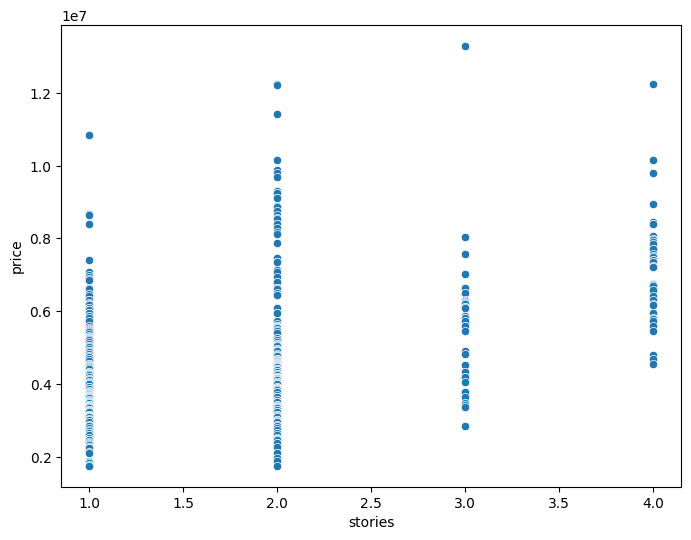

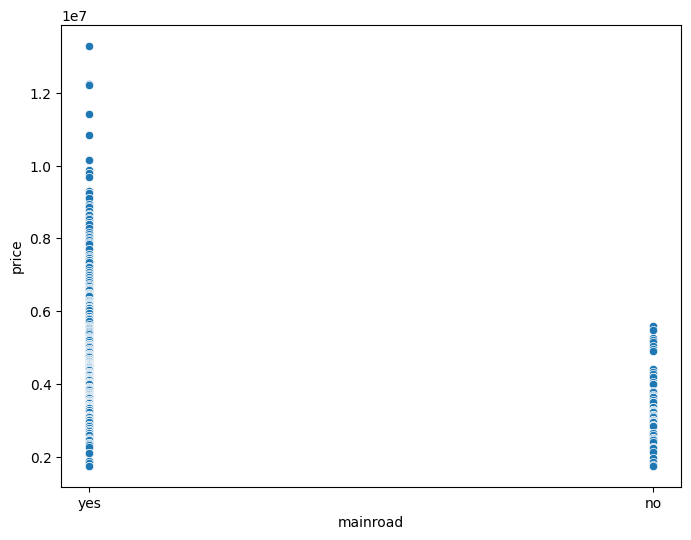

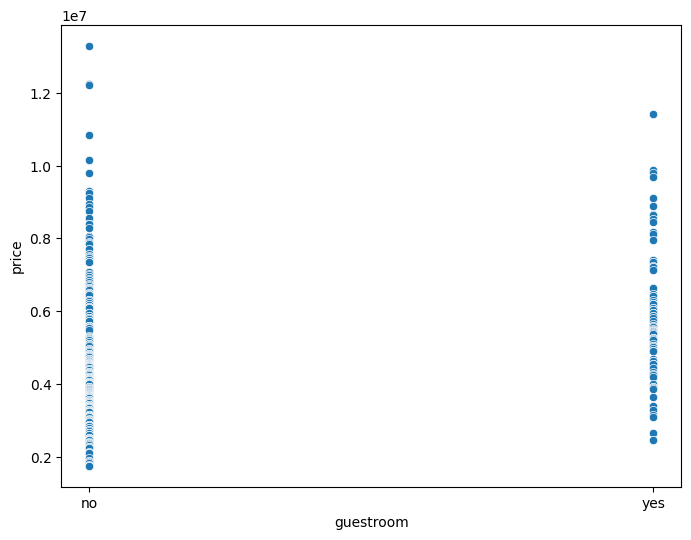

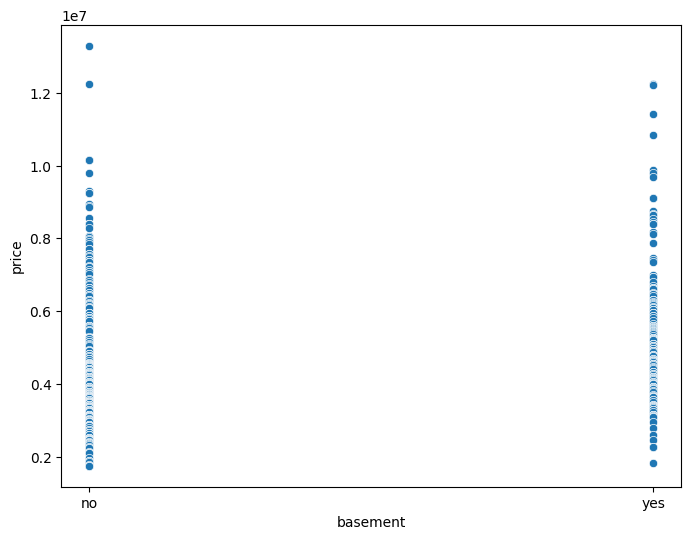

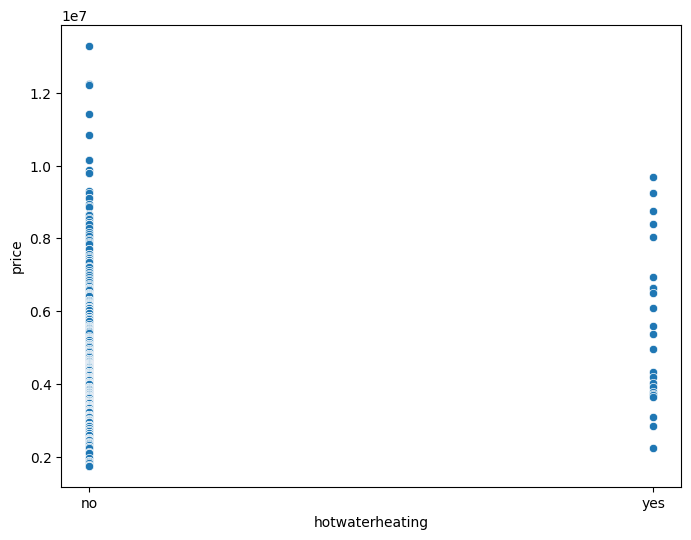

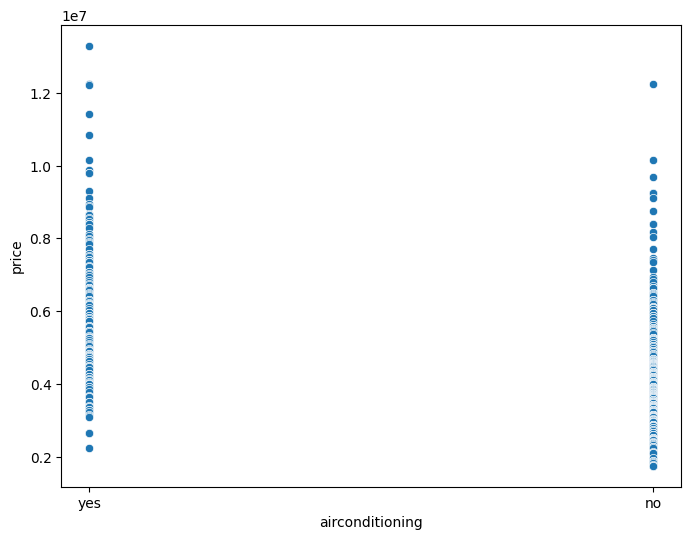

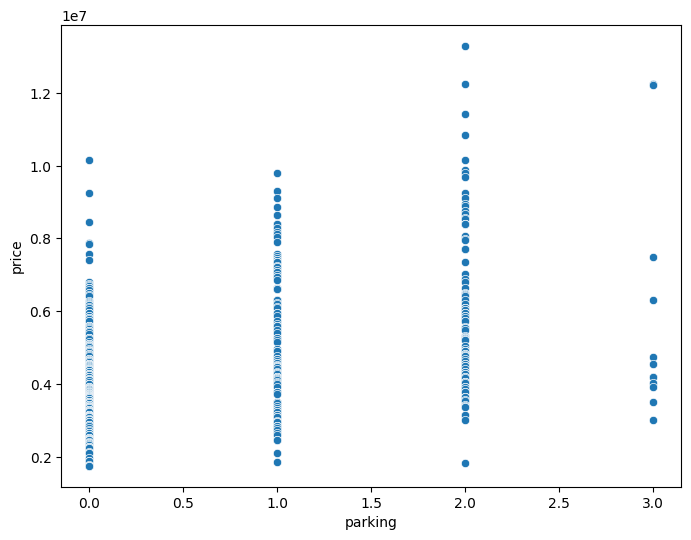

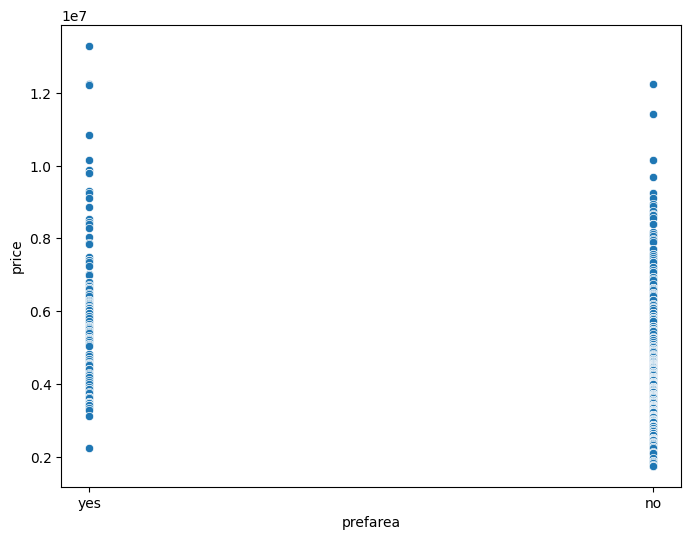

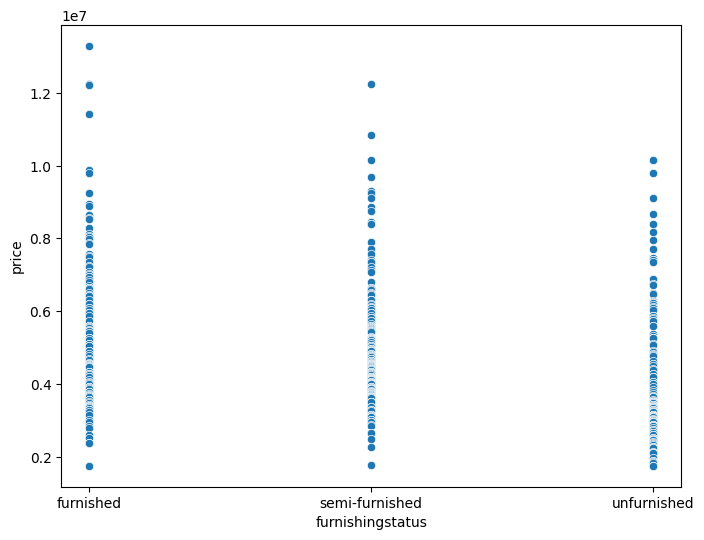

In [138]:
Y=df['price']
for column in df.columns:
    if column!='price':
        X=df[column]
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=X,y=Y)
        plt.show()

In [139]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [140]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])
df['mainroad']=label_encoder.fit_transform(df['mainroad'])
df['guestroom']=label_encoder.fit_transform(df['guestroom'])
df['basement']=label_encoder.fit_transform(df['basement'])
df['hotwaterheating']=label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']=label_encoder.fit_transform(df['airconditioning'])
df['prefarea']=label_encoder.fit_transform(df['prefarea'])



print(df['furnishingstatus'])



0      0
1      0
2      1
3      0
4      0
      ..
540    2
541    1
542    2
543    0
544    2
Name: furnishingstatus, Length: 545, dtype: int64


In [141]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [142]:
#8  Avoiding the Dummy Variable Trap
# df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'prefarea'])

# print(df_encoded.head())

In [143]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Original data:\n", df)
print("Scaled data (using MinMaxScaler):\n", scaled_df)



Original data:
         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0            

In [ ]:
scaled_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [150]:
Y=scaled_df['price']
X=scaled_df.drop(columns=['price'])

In [154]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [155]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training set features (X_train):", X_train.shape)
print("Test set features (X_test):", X_test.shape)
print("Training set target (y_train):", y_train.shape)
print("Test set target (y_test):", y_test.shape)


Training set features (X_train): (381, 12)
Test set features (X_test): (164, 12)
Training set target (y_train): (381,)
Test set target (y_test): (164,)


In [156]:
print(X_train)

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
126  0.378694       0.4   0.000000  0.000000       1.0        0.0       1.0   
363  0.132921       0.2   0.000000  0.000000       1.0        0.0       0.0   
370  0.180756       0.2   0.000000  0.000000       1.0        0.0       0.0   
31   0.367698       0.4   0.000000  1.000000       1.0        0.0       0.0   
113  0.547766       0.4   0.000000  0.000000       1.0        0.0       1.0   
..        ...       ...        ...       ...       ...        ...       ...   
71   0.298969       0.6   0.333333  1.000000       1.0        0.0       0.0   
106  0.261168       0.6   0.333333  0.000000       1.0        0.0       1.0   
270  0.195876       0.4   0.333333  0.666667       1.0        0.0       0.0   
435  0.164261       0.2   0.000000  0.000000       1.0        0.0       0.0   
102  0.264605       0.4   0.333333  1.000000       1.0        1.0       0.0   

     hotwaterheating  airconditioning   parking  pr

In [157]:
#11 Fitting Multiple Linear Regression to the Training
# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# model.fit(X_train,y_train)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)




Coefficients:  [ 0.3187928   0.03581596  0.29022672  0.10800029  0.03535242  0.02420208
  0.04198963  0.05367397  0.05887506  0.07898139  0.04410749 -0.03429114]
Intercept:  0.03529172849997145


In [160]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Assuming you already have X_train and y_train and have fit the model as shown before

# Predict on the training set
y_pred = regressor.predict(X_train)

# Calculate the error
error = y_pred - y_train

# Print the results
print("Predictions: ", y_pred)
print("Error: ", error)

Predictions:  [0.31015574 0.15670999 0.2298148  0.40457392 0.39834587 0.37885747
 0.12163645 0.25032678 0.61142768 0.29453454 0.48589982 0.55132697
 0.13619617 0.4528604  0.31238318 0.23980307 0.14457796 0.22750187
 0.40136701 0.35234087 0.30372502 0.18057805 0.43286533 0.12708449
 0.12832125 0.10825208 0.5871103  0.37274916 0.39075165 0.22560233
 0.27266752 0.49454159 0.30980041 0.20237637 0.09588148 0.57700405
 0.24216684 0.29486577 0.3464057  0.31994036 0.0788792  0.3392337
 0.13039172 0.26901258 0.46338391 0.34407084 0.38411407 0.53705094
 0.61328316 0.37919834 0.45271636 0.20815263 0.56944524 0.30761164
 0.14940971 0.33445416 0.21192374 0.30949062 0.16284897 0.19315135
 0.46315462 0.12310572 0.17043257 0.3463537  0.37317494 0.13363439
 0.14205855 0.27727561 0.27153041 0.34105288 0.19704342 0.45412671
 0.18476157 0.33263235 0.25178061 0.30030835 0.28618402 0.27167319
 0.1715831  0.12220861 0.09500508 0.19587048 0.37924799 0.42071761
 0.22990866 0.26636986 0.4418072  0.38663437 0.23

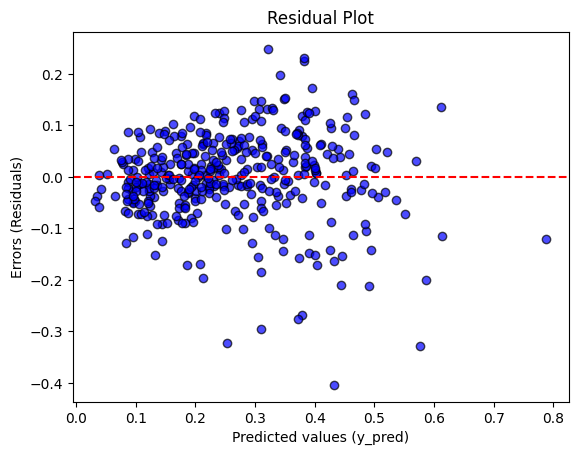

In [161]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_pred, error, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Errors (Residuals)')
plt.show()

In [162]:
#14  Predic on the test set

y_test_pred = regressor.predict(X_test)

print("Predictions on test set: ", y_test_pred)


Predictions on test set:  [0.31666743 0.46295978 0.11302705 0.23609915 0.135583   0.1617639
 0.34702264 0.40835519 0.09353014 0.07262378 0.68394713 0.09355901
 0.11239287 0.142232   0.17950069 0.31239575 0.10433043 0.26719087
 0.24701892 0.15597096 0.33549947 0.35038429 0.08731461 0.27041266
 0.33340302 0.52139209 0.14125854 0.3134833  0.57165939 0.14338615
 0.39702835 0.14521455 0.4320993  0.212609   0.16231193 0.35040446
 0.28831386 0.22822992 0.11429762 0.24978791 0.25917052 0.14577338
 0.46120697 0.20316866 0.17240358 0.22150791 0.42675174 0.20282676
 0.18374122 0.1677388  0.49457791 0.09942205 0.23822464 0.23178128
 0.17943353 0.07722491 0.49876533 0.10311211 0.21615702 0.09062304
 0.28557044 0.15869574 0.30346787 0.21690351 0.26472792 0.25638372
 0.47710227 0.15824784 0.39271783 0.39553519 0.26045862 0.28712949
 0.25202804 0.54691698 0.15137349 0.31858998 0.19986143 0.23298997
 0.26548191 0.1982816  0.51970981 0.209721   0.42902034 0.3187657
 0.087775   0.46711559 0.07587608 0.16

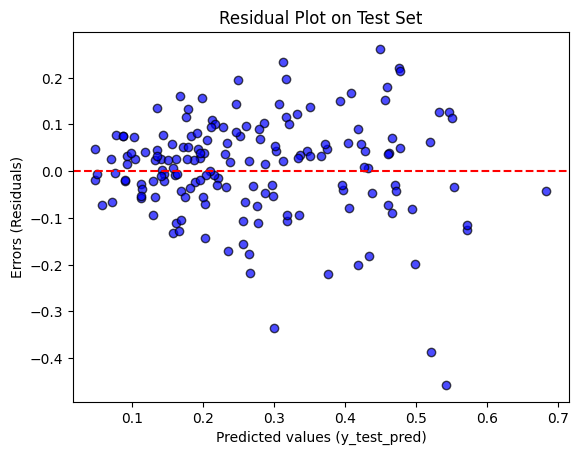

In [163]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
error_test = y_test_pred - y_test

# Create the residual plot
plt.scatter(y_test_pred, error_test, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title('Residual Plot on Test Set')
plt.xlabel('Predicted values (y_test_pred)')
plt.ylabel('Errors (Residuals)')
plt.show()


In [ ]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Mean Squared Error (MSE): 0.011506888989547045
R-squared (R²): 0.6435419628959107


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)





In [ ]:

from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# create sample data
data = np.array([[10, 20, 30], [15, 25, 35], [20, 30, 40]])

# create MaxAbsScaler object
scaler = MaxAbsScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original data:\n", data)
print("Scaled data (using MaxAbsScaler):\n", scaled_data)


Original data:
 [[10 20 30]
 [15 25 35]
 [20 30 40]]
Scaled data (using MaxAbsScaler):
 [[0.5        0.66666667 0.75      ]
 [0.75       0.83333333 0.875     ]
 [1.         1.         1.        ]]


In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})

#view DataFrame
print(df)


  team  points
0    A      25
1    A      12
2    B      15
3    B      14
4    B      19
5    B      23
6    C      25
7    C      29


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['team'] = lab.fit_transform(df['team'])

#view updated DataFrame
print(df)

   team  points
0     0      25
1     0      12
2     1      15
3     1      14
4     1      19
5     1      23
6     2      25
7     2      29


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.        , 0.76470588],
       [0.        , 0.        ],
       [0.5       , 0.17647059],
       [0.5       , 0.11764706],
       [0.5       , 0.41176471],
       [0.5       , 0.64705882],
       [1.        , 0.76470588],
       [1.        , 1.        ]])